In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# loading the model

In [2]:
ds = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')

In [3]:
ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# feature selection

In [5]:
ds.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
ds = ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
ds.columns = ['cls','email']

In [9]:
ds.head()

,cls,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## cheking duplicates

In [10]:
ds.duplicated().sum()

403

In [11]:
ds = ds.drop_duplicates(keep='first')

In [12]:
ds.duplicated().sum()

0

## encoding categorical values

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
ds['cls'] = le.fit_transform(ds['cls'])

In [15]:
ds.cls.value_counts()

cls
0    4516
1     653
Name: count, dtype: int64

##  ham : 0 ; spam : 1

In [16]:
ds.head()

,cls,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
ham = ds[ds['cls']==0]
spam = ds[ds['cls']==1]
ham.head(),spam.head()

(   cls                                              email
 0    0  Go until jurong point, crazy.. Available only ...
 1    0                      Ok lar... Joking wif u oni...
 3    0  U dun say so early hor... U c already then say...
 4    0  Nah I don't think he goes to usf, he lives aro...
 6    0  Even my brother is not like to speak with me. ...,
     cls                                              email
 2     1  Free entry in 2 a wkly comp to win FA Cup fina...
 5     1  FreeMsg Hey there darling it's been 3 week's n...
 8     1  WINNER!! As a valued network customer you have...
 9     1  Had your mobile 11 months or more? U R entitle...
 11    1  SIX chances to win CASH! From 100 to 20,000 po...)

In [18]:
ham_txt = " ".join(ham.email)
ham_txt[0:25]

'Go until jurong point, cr'

In [19]:
spam_txt = " ".join(spam.email)
spam_txt[0:25]

'Free entry in 2 a wkly co'

# visualization

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

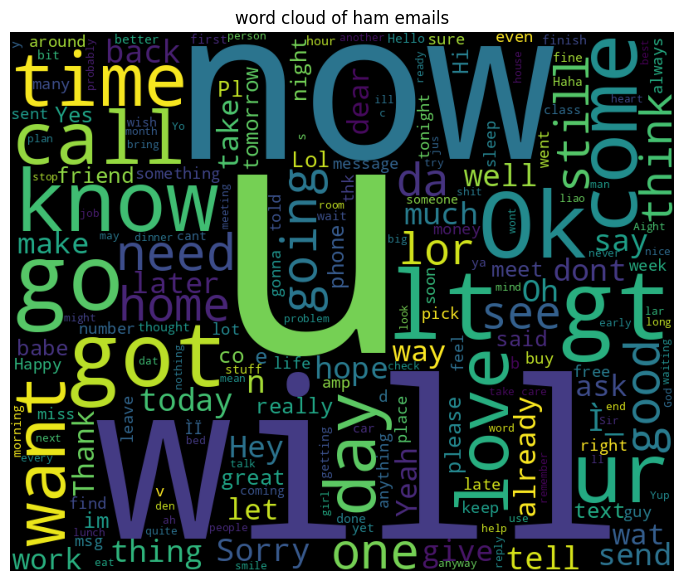

In [21]:
plt.figure(figsize=(10,7))
wc = WordCloud(width=800,height=650).generate(ham_txt)
plt.imshow(wc)
plt.axis('off')
plt.title('word cloud of ham emails')
plt.show()

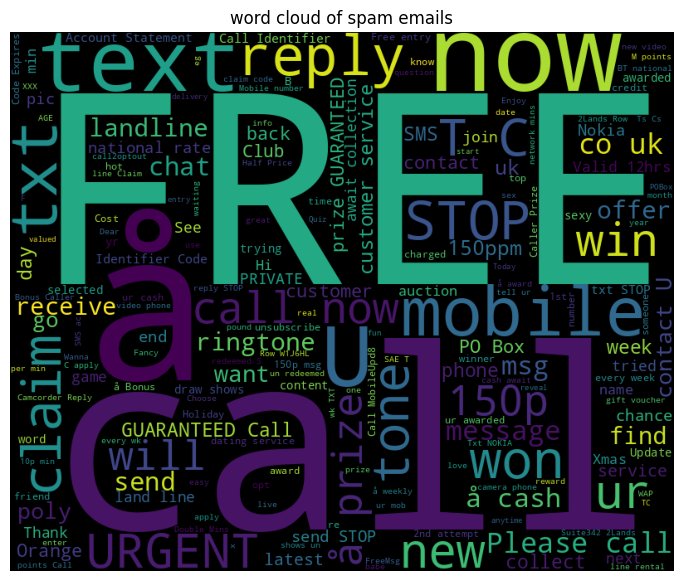

In [22]:
plt.figure(figsize=(10,7))
wc = WordCloud(width=800,height=650).generate(spam_txt)
plt.imshow(wc)
plt.axis('off')
plt.title('word cloud of spam emails')
plt.show()

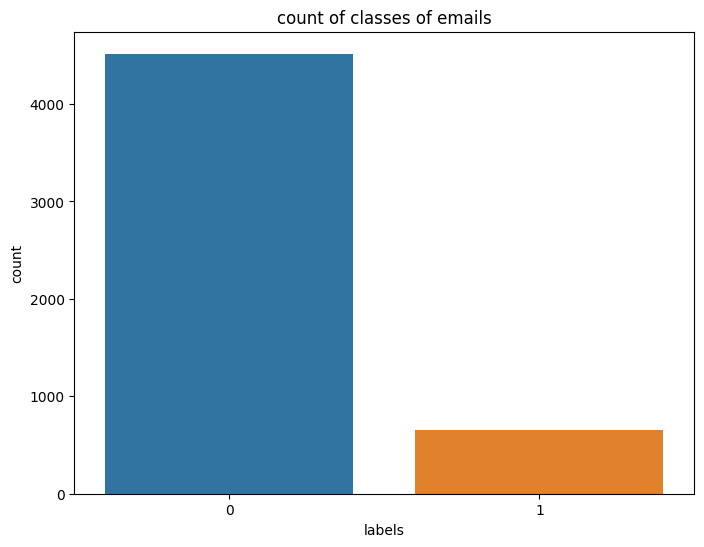

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x = ds['cls'])
plt.xlabel('labels')
plt.ylabel('count')
plt.title('count of classes of emails')
plt.show()

# preprocessing pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
import spacy

In [26]:
nlp = spacy.load("en_core_web_sm")

In [27]:
model = Pipeline([
    ('vectorizer',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in nlp(txt)],
    stop_words = 'english',
    ngram_range=(1,2),
    max_features=500))
])

In [28]:
x_prep = model.fit_transform(ds['email'])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_prep,ds['cls'],test_size=0.2,random_state=42,stratify=ds['cls'])

In [30]:
x_train.shape,x_test.shape

((4135, 500), (1034, 500))

In [31]:
max_words = x_prep.shape[1]  # Number of words in the TF-IDF vocabulary
max_length = x_prep.shape[1]  # Maximum sequence length

# model creation

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding,Masking

In [33]:
dl_model = Sequential([
    Embedding(input_dim=max_words,output_dim=128,input_length=max_length,mask_zero=True),
    Masking(mask_value=0.0),
    LSTM(64,return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [34]:
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [36]:
epochs = 5
batch_size = 64
history = dl_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/5
65/65 [==============================] - 74s 990ms/step - loss: 0.4205 - accuracy: 0.8684 - val_loss: 0.3828 - val_accuracy: 0.8733
Epoch 2/5
65/65 [==============================] - 61s 935ms/step - loss: 0.3895 - accuracy: 0.8738 - val_loss: 0.3801 - val_accuracy: 0.8733
Epoch 3/5
65/65 [==============================] - 61s 942ms/step - loss: 0.3937 - accuracy: 0.8738 - val_loss: 0.3801 - val_accuracy: 0.8733
Epoch 4/5
65/65 [==============================] - 61s 940ms/step - loss: 0.3928 - accuracy: 0.8738 - val_loss: 0.3817 - val_accuracy: 0.8733
Epoch 5/5
65/65 [==============================] - 62s 954ms/step - loss: 0.3980 - accuracy: 0.8738 - val_loss: 0.3801 - val_accuracy: 0.8733


# learning curve

In [37]:
def learning_curve(history, epoch):
    # training vs validation accuracy
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

# training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

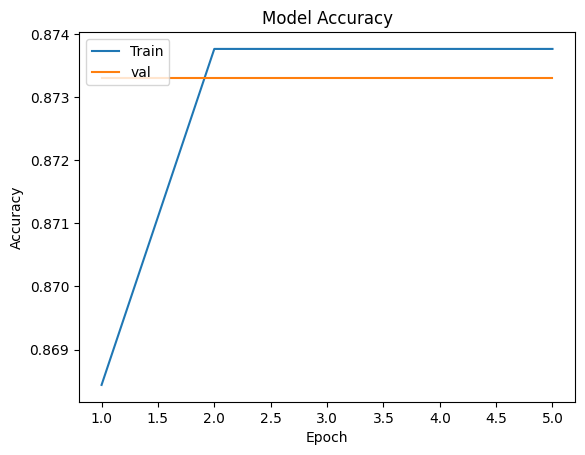

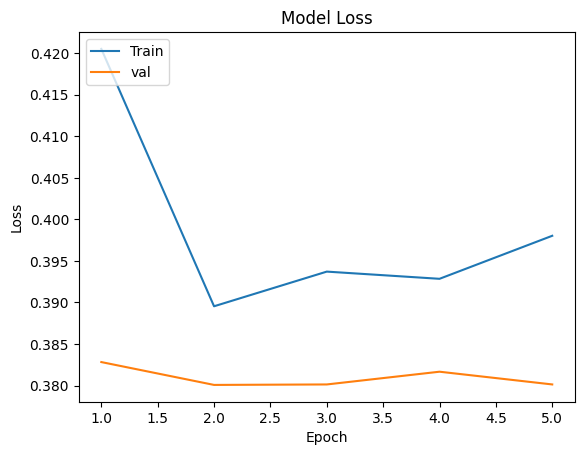

In [38]:
learning_curve(history, 5)